# Bayesian Networks

**Colaborators:** Andrej Betík (456604), Robin Knaur (409844), Jiří Novotný (409963)

In [1]:
install.packages("tidyr")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## 1. Introduction

### We have chosen these three methods
 - Bayesian Generalized Linear Model
 - Bayesian Additive Regression Trees
 - Bayesian Ridge Regression (Jiří Novotný)
 
 ### And we have these three datasets
 - Bank dataset
 - German Credit Data
 - Energy efficiency (Jiří Novotný)
 

## 2. Exploratory Analysis

### Bank dataset
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#### Attribute Information:

##### Input variables:
###### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
###### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
###### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
###### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

###### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


### German Credit Data
The original dataset contains 1000 entries with 20 categorial/symbolic attributes. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.
I have ignored som columns, because either they are not important or their descriptions are obscure.

#### Attribute Information:
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
###### Output variable (desired target)
10. Risk (Value target - Good or Bad Risk)

### Visualization

'data.frame':	1000 obs. of  10 variables:
 $ Age             : int  67 22 49 45 53 35 53 35 61 28 ...
 $ Sex             : Factor w/ 2 levels "female","male": 2 1 2 2 2 2 2 2 2 2 ...
 $ Job             : int  2 2 1 2 2 1 2 3 1 3 ...
 $ Housing         : Factor w/ 3 levels "free","own","rent": 2 2 2 1 1 1 2 3 2 2 ...
 $ Saving.accounts : Factor w/ 4 levels "little","moderate",..: NA 1 1 1 1 NA 3 1 4 1 ...
 $ Checking.account: Factor w/ 3 levels "little","moderate",..: 1 2 NA 1 1 NA NA 2 NA 2 ...
 $ Credit.amount   : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Duration        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Purpose         : Factor w/ 8 levels "business","car",..: 6 6 4 5 2 4 5 2 6 2 ...
 $ Risk            : Factor w/ 2 levels "bad","good": 2 1 2 2 1 2 2 2 2 1 ...


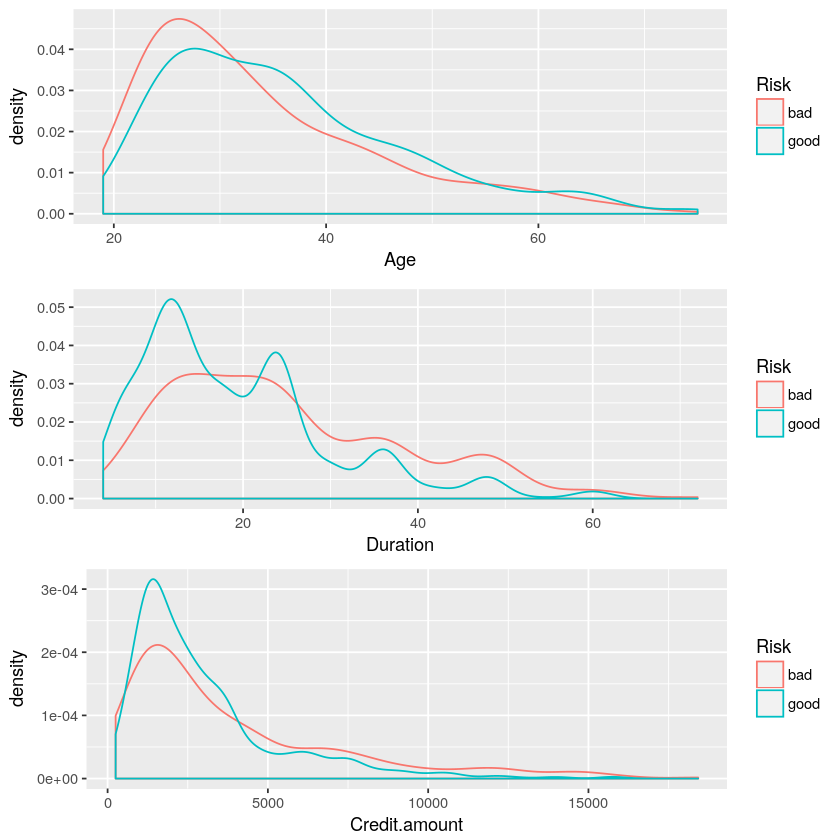

In [2]:
suppressWarnings(suppressMessages(library(caret)))
suppressWarnings(suppressMessages(library(gridExtra)))
german_credit <- read.csv("datasets/german_credit.csv")
str(german_credit)
# People at very young age seem to have worse credit worthiness
p1 <- ggplot(german_credit, aes(x=Age, color=Risk)) + geom_density()
# Surprisingly there's not really a trend of "Longer duration better credit worthiness"
p2 <- ggplot(german_credit, aes(x=Duration, color=Risk)) + geom_density()
# A trend of "Higher credit amount, better credit worthiness"
p3 <- ggplot(german_credit, aes(x=Credit.amount, color=Risk)) + geom_density()
grid.arrange(p1, p2, p3)

### Energy efficiency
* Authors: Angeliki Xifara, Athanasios Tsanas
* Link: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

#### Abstract
Authors performed energy analysis using 12 different building shapes simulated in Ecotect. The buildings differed with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. They simulated various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#### Attributes
* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load
* y2 Cooling Load

In [3]:
#load csv
energy <- read.csv("datasets/energy_efficency.csv")

#rename columns
names(energy) <- c("relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height",
                   "orientation", "glazing_area", "glazing_area_distribution", "heating_load", "cooling_load")
head(energy)

relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [4]:
# number of samples
nrow(energy)

[1] 768

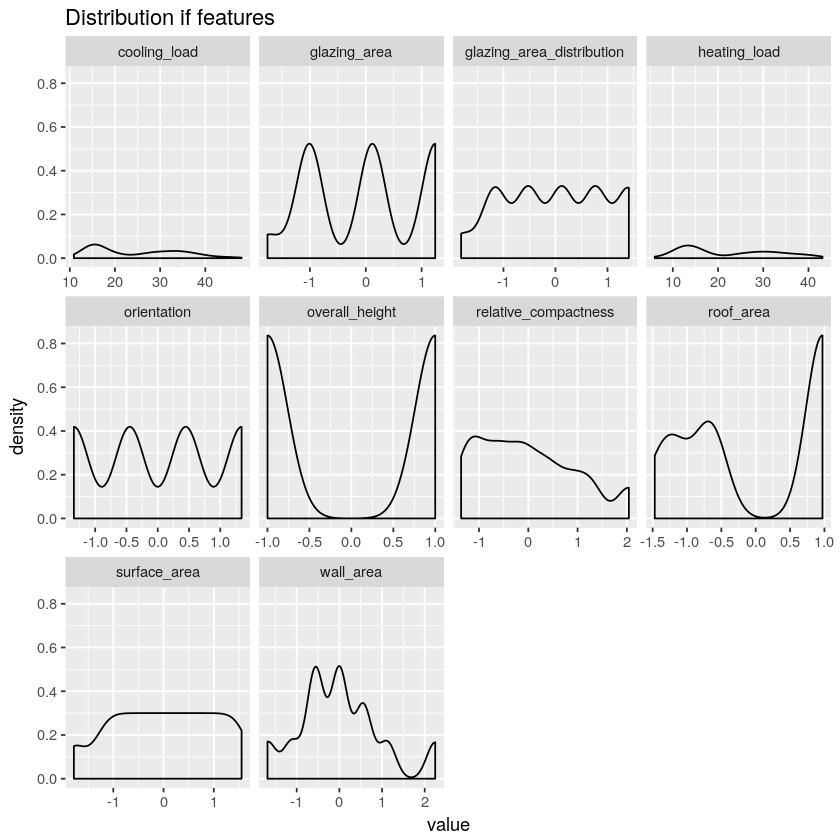

In [18]:
library(tidyr)
library(ggplot2)

# look at distribution of values for each feature
ggplot(gather(energy), aes(value)) +
    geom_density() +
    facet_wrap(~key, scales = 'free_x') +
    ggtitle("Distribution if features")

## 3. Preprocessing

### Bank dataset

This dataset could be used without any preprocessing, but it still be usefull to do some.

First remove the duration column, becase it represents length of a phonecall which couldn't be known before phonecall itself and strongly correlate with output variable.

Since it's a telemarketing, majority of people refused an offer, so the distribution of classes is unbalanced I decided to use oversampling to deal with this issue. If I wouldn't use it sensitivity would be very low.
```
#load datasets
bank_train <- read.csv("bank-additional.csv", sep=";")
bank_test <- read.csv("bank-additional-full.csv", sep=";")

#remove duration column
bank_train_without_duration <- subset(bank_train, select = -c(duration))
bank_test_without_duration <- subset(bank_test, select = -c(duration))

# oversampling
library(splitstackshape)

yes_rows = subset(bank_train, y == 'yes')
multiplied_yes_rows = expandRows(yes_rows, 8, count.is.col = FALSE, drop = FALSE)
oversampled_bank_train = rbind(bank_train, multiplied_yes_rows)


```

### Bank dataset
There are missing values.

In [6]:
sum(is.na(german_credit))
# But all of them are in attributes Saving.accounts and Checking.accounts which are categorical values
sum(is.na(german_credit$Checking.account)) + sum(is.na(german_credit$Saving.accounts))
head(german_credit$Saving.accounts, n = 15)
head(german_credit$Checking.account, n = 15)

[1] 577

[1] 577

[1] <NA>       little     little     little     little     <NA>      
 [7] quite rich little     rich       little     little     little    
[13] little     little     little    
Levels: little moderate quite rich rich

[1] little   moderate <NA>     little   little   <NA>     <NA>     moderate
 [9] <NA>     moderate moderate little   moderate little   little  
Levels: little moderate rich

In [7]:
# To get rid of missing values I replace <NA> samples with a new level "Unknown"
levels(german_credit$Saving.accounts) = c(levels(german_credit$Saving.accounts), "Unknown")
german_credit$Saving.accounts[which(is.na(german_credit$Saving.accounts))] = "Unknown"
levels(german_credit$Checking.account) = c(levels(german_credit$Checking.account), "Unknown")
german_credit$Checking.account[which(is.na(german_credit$Checking.account))] = "Unknown"
head(german_credit$Saving.accounts)
head(german_credit$Checking.account)
sum(is.na(german_credit))

[1] Unknown little  little  little  little  Unknown
Levels: little moderate quite rich rich Unknown

[1] little   moderate Unknown  little   little   Unknown 
Levels: little moderate rich Unknown

[1] 0

### Energy efficiency

In [8]:
# Contains any NA values?
any(is.na(energy))

[1] FALSE

In [9]:
# define my version of summary method with standard deviation included
energy_summary <- function(df) {
    data.frame(mean=sapply(df, mean),
               std=sapply(df, sd),
               min=sapply(df, min),
               q_0.25=sapply(df, function(col) quantile(col, probs=0.25)),
               q_0.50=sapply(df, function(col) quantile(col, probs=0.50)),
               q_0.75=sapply(df, function(col) quantile(col, probs=0.75)),
               max=sapply(df, max))
}

# check the means and standard deviations for each feature
energy_summary(energy)

,mean,std,min,q_0.25,q_0.50,q_0.75,max
relative_compactness,0.7641667,0.1057775,0.62,0.6825,0.75,0.8300,0.98
surface_area,671.7083333,88.0861161,514.50,606.3750,673.75,741.1250,808.50
wall_area,318.5000000,43.6264814,245.00,294.0000,318.50,343.0000,416.50
roof_area,176.6041667,45.1659502,110.25,140.8750,183.75,220.5000,220.50
overall_height,5.2500000,1.7511404,3.50,3.5000,5.25,7.0000,7.00
orientation,3.5000000,1.1187626,2.00,2.7500,3.50,4.2500,5.00
glazing_area,0.2343750,0.1332206,0.00,0.1000,0.25,0.4000,0.40
glazing_area_distribution,2.8125000,1.5509597,0.00,1.7500,3.00,4.0000,5.00
heating_load,22.3071953,10.0902040,6.01,12.9925,18.95,31.6675,43.10
cooling_load,24.5877604,9.5133056,10.90,15.6200,22.08,33.1325,48.03


In [10]:
# normalize each feature (transform them to have mean=0 and std=1) - leave out the dependant variables
energy_feat <- energy[, !(names(energy) %in% c("heating_load", "cooling_load"))]
energy_feat <- as.data.frame(scale(energy_feat))
energy_feat$heating_load <- energy$heating_load
energy_feat$cooling_load <- energy$cooling_load
energy <- energy_feat
rm(energy_feat)

# recheck the means and stadard deviations
energy_summary(energy)

,mean,std,min,q_0.25,q_0.50,q_0.75,max
relative_compactness,-7.914394e-18,1.000000,-1.3629241,-0.7720610,-0.13392895,0.6223757,2.0404470
surface_area,-4.431493e-16,1.000000,-1.7847118,-0.7416984,0.02317808,0.7880546,1.5529311
wall_area,0.000000e+00,1.000000,-1.6847565,-0.5615855,0.00000000,0.5615855,2.2463421
roof_area,2.036136e-16,1.000000,-1.4691192,-0.7910642,0.15821284,0.9718789,0.9718789
overall_height,0.000000e+00,1.000000,-0.9993487,-0.9993487,0.00000000,0.9993487,0.9993487
orientation,0.000000e+00,1.000000,-1.3407670,-0.6703835,0.00000000,0.6703835,1.3407670
glazing_area,1.158831e-16,1.000000,-1.7593005,-1.0086656,0.11728670,1.2432390,1.2432390
glazing_area_distribution,1.053257e-17,1.000000,-1.8133934,-0.6850597,0.12089289,0.7656550,1.4104171
heating_load,2.230720e+01,10.090204,6.0100000,12.9925000,18.95000000,31.6675000,43.1000000
cooling_load,2.458776e+01,9.513306,10.9000000,15.6200000,22.08000000,33.1325000,48.0300000


## 4. Learning Algorithms

### Bayesian Generalized Linear Model
```
model <- train(y ~ ., data = oversampled_bank_train, method = 'bayesglm')

prediction <- predict(model, newdata = bank_test)
confusionMatrix(prediction, bank_test$y, positive="yes")

```

### Bayesian Additive Regression Trees

In [11]:
# Setting computing parameters. 4 GB RAM for Java heap and number of computing cores set to 4.
suppressPackageStartupMessages(suppressWarnings(options(java.parameters = "-Xmx4g")))
suppressPackageStartupMessages(suppressWarnings(library("bartMachine")))
suppressPackageStartupMessages(suppressWarnings(set_bart_machine_num_cores(4)))

ERROR: Error in library("bartMachine"): there is no package called ‘bartMachine’


In [ ]:
# Creating a data partition to train
set.seed(123)
trainIndex <- createDataPartition(german_credit$Risk, .75, list=FALSE, times = 1)
trControl <- trainControl(method = "cv",  number=5, verboseIter=FALSE)
bartmachine_fit <- suppressWarnings(train(Risk ~ ., 
                                          data = german_credit[trainIndex,], 
                                          method ="bartMachine",
                                          tuneLength = 5, 
                                          trControl = trControl,
                                          metric = 'Accuracy'))

In [ ]:
bartMachine_predict <- predict(bartmachine_fit, german_credit[-trainIndex,])
confusionMatrix(bartMachine_predict, german_credit[-trainIndex,]$Risk)

In [ ]:
# Bayesian Generalized Linear Model
suppressPackageStartupMessages(suppressWarnings(library(arm)))
glm_fit <- suppressWarnings(train(Risk ~ ., 
                                  data = german_credit[trainIndex,], 
                                  method ="bayesglm",
                                  tuneLength = 5, 
                                  trControl = trControl,
                                  preProc = c('center', 'scale'),
                                  metric = 'Accuracy'))

In [ ]:
bayesglm_test_pred <- predict(glm_fit, german_credit[-trainIndex,])
confusionMatrix(bayesglm_test_pred, german_credit[-trainIndex,]$Risk)

## 5. Evaluation

## 6. Conclusion

## 7. References

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing